# UK RETAIL SALES ANALYSIS

In [56]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style to make your plots look better without... 
# manually adjusting colors, fonts, etc.
plt.style.use("seaborn-v0_8")

In [57]:
!pip install openpyxl 
# This is necessary to run only once to read .xlsx or excel files


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
# changing working directory on my local computer
import os
# Check current working directory
print(os.getcwd())

# Change to project directory on my local pc
os.chdir('C:/Users/oyeor/Downloads/PORTFOLIO/uk-retail-sales-analysis')

C:\Users\oyeor\Downloads\PORTFOLIO\uk-retail-sales-analysis


In [59]:
# Load dataset
file_path = "data/raw/Online Retail.xlsx"
df = pd.read_excel(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [60]:
# check the data types and non-null counts i.e data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [61]:
# summary statistics for numeric columns 
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [62]:
# check missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [63]:
# check for duplicate rows
df.duplicated().sum()

np.int64(5268)

In [64]:
# Remove duplicates
df = df.drop_duplicates()

# Double check if duplicates are realy gone
df.duplicated().sum()

np.int64(0)

## 2.0 Exploratory Data Analysis

#### *2.1 Top Selling products*

In [65]:
# Top 10 most sold products by quantity
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(10)
top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

###### Small decorative and gifting items dominate the list. Party supplies like "cake cases" and "tissues" are also very popular. The company might be targeting home decor,gifts, and party accessories markets heavily. These could be the products they prioritize for marketing, stock management, and promotions. 

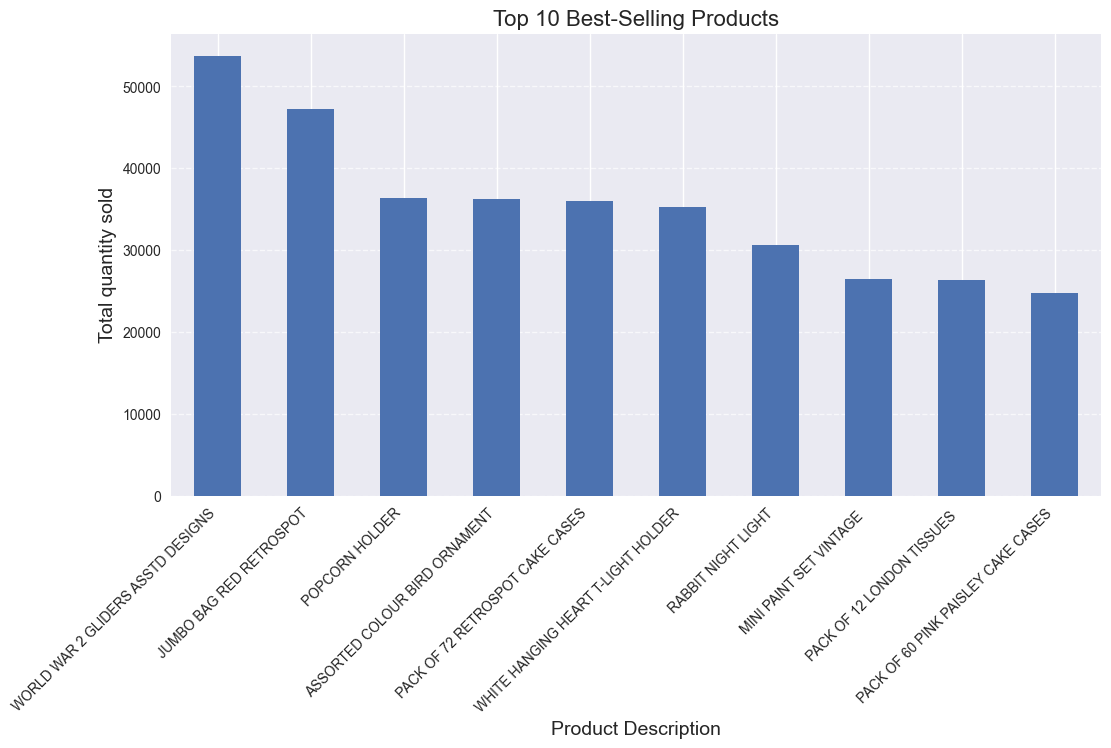

In [66]:
import matplotlib.pyplot as plt

# create the bar 
plt.figure(figsize = (12,6)) # size of the chart
top_products.plot(kind = "bar")

# Add title and labels
plt.title("Top 10 Best-Selling Products", fontsize = 16)
plt.xlabel("Product Description", fontsize = 14)
plt.ylabel("Total quantity sold", fontsize = 14)

# rotate x-axis labels for better readability
plt.xticks (rotation = 45, ha = "right" )

# Add grid for better visibility
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

# show the chart
plt.tight_layout
plt.savefig('top_10_products.png')
plt.show()


#### *2.2 Monthly sales trend*

In [67]:
# Create new column for sales revenue
df["SalesRevenue"] = df["UnitPrice"]* df["Quantity"]

In [68]:
# create a month name column 
df["InvoiceMonth"] = df["InvoiceDate"].dt.month # month number
df["InvoiceMonthName"] = df["InvoiceDate"].dt.strftime("%b") # month name (3 letters)

In [69]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesRevenue,InvoiceMonth,InvoiceMonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Dec


In [70]:
# total revenue per month
monthly_revenue = df.groupby(["InvoiceMonth", "InvoiceMonthName"])["SalesRevenue"].sum()
monthly_revenue = monthly_revenue.reset_index()
monthly_revenue = monthly_revenue.sort_values("InvoiceMonth") # to keep months in correct order
monthly_revenue 

,InvoiceMonth,InvoiceMonthName,SalesRevenue
0,1,Jan,558448.560
1,2,Feb,497026.410
2,3,Mar,682013.980
3,4,Apr,492367.841
4,5,May,722094.100
5,6,Jun,689977.230
6,7,Jul,680156.991
7,8,Aug,681386.460
8,9,Sep,1017596.682
9,10,Oct,1069368.230


###### Sales start rising sharply from September onward with November having the highest sales, possibly due to black Friday promotions, pre-Christmas shopping, or holiday sales. 
###### December also remains strong(holiday season sales!) with lower sales in february, april (possibly because shopping events in these months). This insight is extremely valuable for business marketing and inventory planning. 

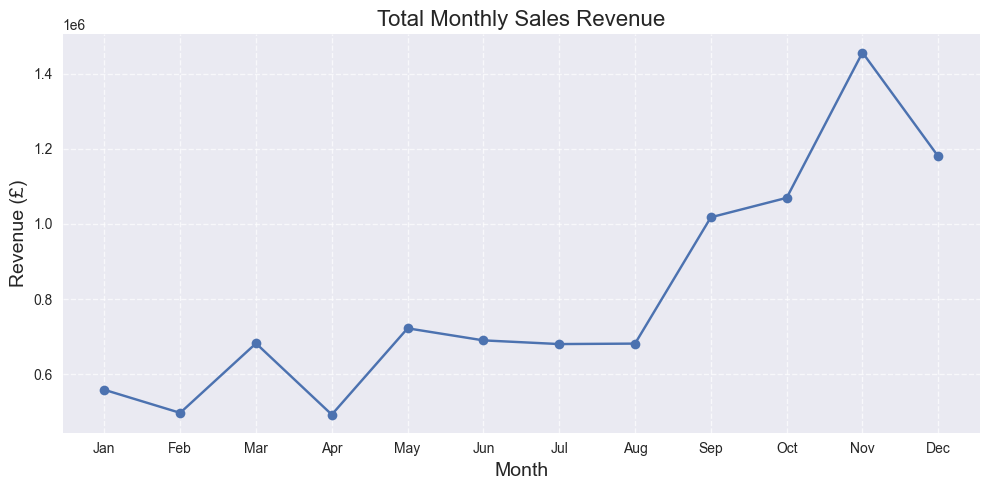

In [71]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize = (10,5))
plt.plot(monthly_revenue["InvoiceMonthName"], monthly_revenue["SalesRevenue"], marker = "o")

# add title and labels
plt.title("Total Monthly Sales Revenue", fontsize = 16)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Revenue (£)", fontsize = 14)

# add grid
plt.grid(True, linestyle = "--", alpha = 0.7)

# show the plot
plt.tight_layout()
plt.savefig("total_monthly_name_sales.png")
plt.show()

###### Sales are lower in the beginning of the year (January–August).
###### Sharp jump starting September — possibly due to holiday shopping preparations.
###### November has the highest peak (likely Black Friday and Christmas shopping).
###### December sales are also high but slightly lower than November. After December, it’s expected sales would fall again (January, new year dip).

#### *2.3 Top countries by revenue (excluding UK)*

In [72]:
# filter out united kingdom 
df_international = df[df["Country"] != "United Kingdom"]

# Group by country and sum up the revenue
country_revenue = df_international.groupby("Country")["SalesRevenue"].sum().sort_values(ascending = False)

# select the top ten countries
top_countries = country_revenue.head(10)
top_countries

Country
Netherlands    284661.54
EIRE           262993.38
Germany        221509.47
France         197317.11
Australia      137009.77
Switzerland     56363.05
Spain           54756.03
Belgium         40910.96
Sweden          36585.41
Japan           35340.62
Name: SalesRevenue, dtype: float64

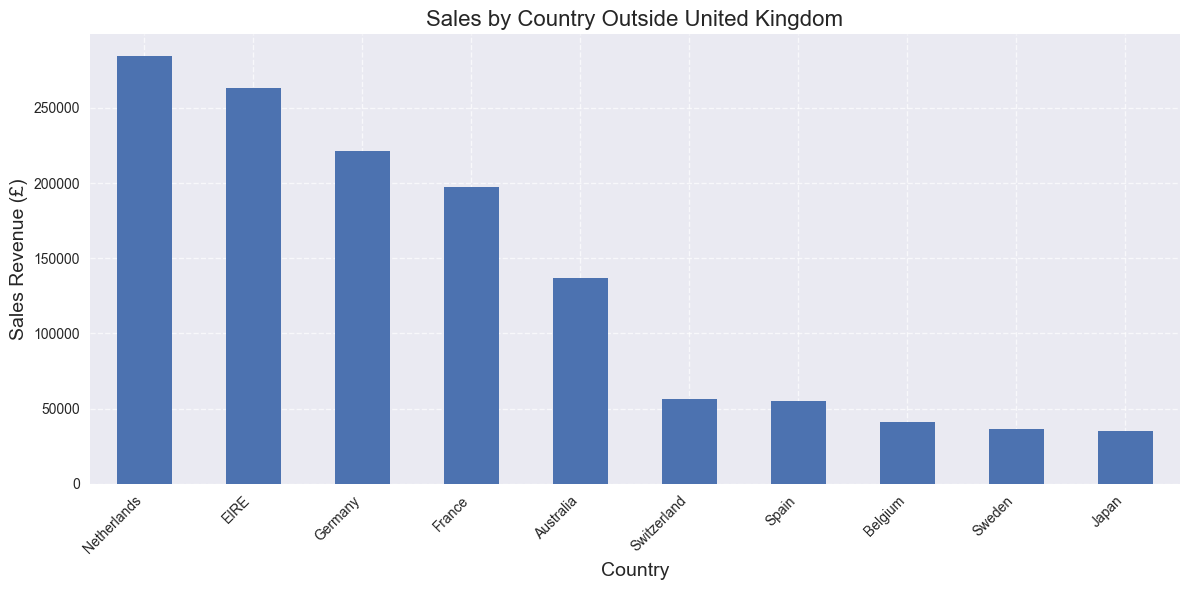

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6)) 
top_countries.plot(kind = "bar")

# set the title and label
plt.title("Sales by Country Outside United Kingdom", fontsize = 16)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Sales Revenue (£)", fontsize = 14)

# rotate the x-ticks to fit well
plt.xticks(rotation = 45, ha = "right")

# set the grid
plt.grid(True , linestyle = "--", alpha = 0.7)

# save and show plot
plt.tight_layout()
plt.savefig("Sales_by_country.png")
plt.show()

###### The UK company's strongest international markets were Netherlands, Ireland, Germany, and France. These countries could be prioritized for New marketing campaigns, special discounts, and logistics hubs. 

## 3.0 Business Analysis

#### *3.1 Top customers*

In [74]:
# Display the top ten customers
top_customers = df.groupby("CustomerID")["SalesRevenue"].sum().sort_values(ascending = False).head(10)
top_customers

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
14911.0    132458.73
12415.0    123725.45
14156.0    113214.59
17511.0     88125.38
16684.0     65892.08
13694.0     62690.54
15311.0     59284.19
Name: SalesRevenue, dtype: float64

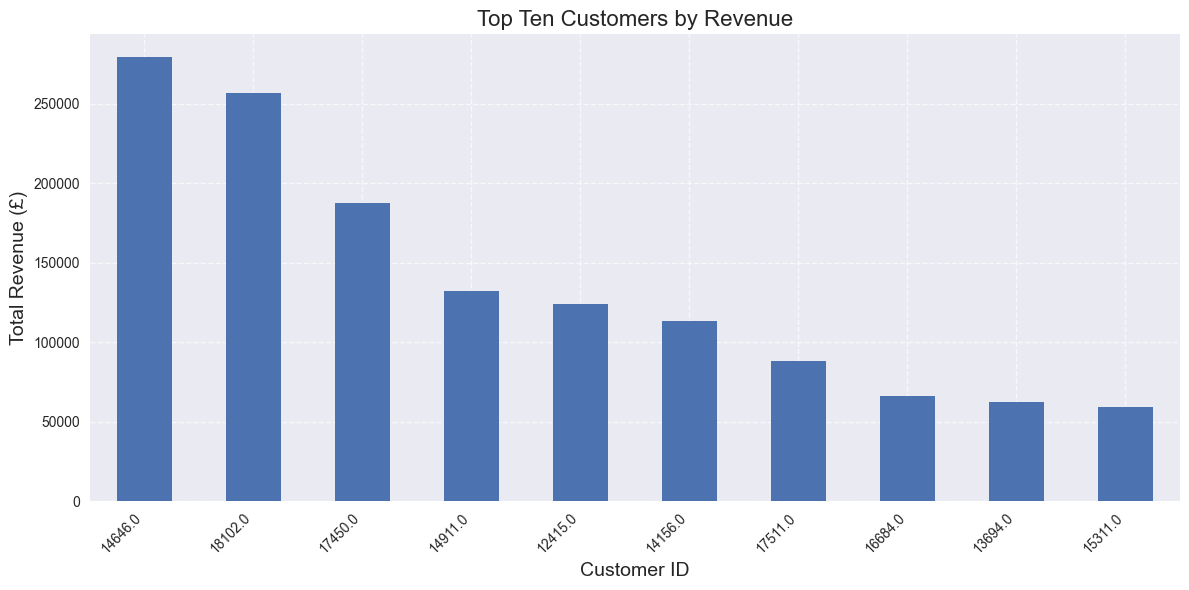

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
top_customers.plot(kind = "bar")

plt.title("Top Ten Customers by Revenue", fontsize = 16)
plt.xlabel("Customer ID", fontsize = 14)
plt.ylabel("Total Revenue (£)", fontsize = 14)

plt.xticks(rotation = 45, ha = "right")
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.tight_layout()
plt.savefig("top_ten_customers.png")
plt.show()

###### Customer 14646.0 and 18102.0 spent massively more than others which indicates they are VIP customers that the company should focus on keeping. A sudden drop after the top 3-4 customers shows revenue concentration risk

#### *3.2 Recency, Frequency and Monetary (RFM) Analysis*
###### *This is used to find the best customers, At-risk customers and potential new champions*

In [76]:
# set a reference date for recency calculation
# (We use the last invoice date + 1 day)
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days = 1)

# Group by Customer ID and calculate R, F, M
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate" : lambda x : (reference_date - x.max()).days,
    "InvoiceNo" : "nunique",
    "SalesRevenue" : "sum"
})
# rename the columns
rfm.rename(columns = {
    "InvoiceDate" : "Recency",
    "InvoiceNo" : "Frequency",
    "SalesRevenue" : "Monetary"
}, inplace = True )

# view the first few rows
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


###### *RFM scoring: 1 to 5 (5 is best)*

In [77]:
# recency score: lower recency is better || reversed labels
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels = [5,4,3,2,1])

# frequency score: higher is better || we do not reverse labels 
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])

# Monetary score : higher is better || we leave the labels as it is in ascending order
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels = [1,2,3,4,5])

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346.0,326,2,0.00,1,2,1
12347.0,2,7,4310.00,5,4,5
12348.0,75,4,1797.24,2,3,4
12349.0,19,1,1757.55,4,1,4
12350.0,310,1,334.40,1,1,2


###### 12347.0 is a VIP customer -> They buy often, spend a lot, and bought recently. high R, F, and M scores (excellent loyalty) || 12346.0 and 12350.0 are cold or at_risk customers as they have not bought recently and have low spending || 12349.0 is recent, but low activity as they bought not long ago, but only once (could be new or  casual)

In [78]:
# combine R,F,M scores into a single 3-digit segment code (as string type)
rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
CustomerID,,,,,,,
12346.0,326,2,0.00,1,2,1,121
12347.0,2,7,4310.00,5,4,5,545
12348.0,75,4,1797.24,2,3,4,234
12349.0,19,1,1757.55,4,1,4,414
12350.0,310,1,334.40,1,1,2,112


In [79]:
# create an RFM score which lets us rank customers overall by total (max 15 , min 3)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,2,1,121,4
12347.0,2,7,4310.00,5,4,5,545,14
12348.0,75,4,1797.24,2,3,4,234,9
12349.0,19,1,1757.55,4,1,4,414,9
12350.0,310,1,334.40,1,1,2,112,4


##### The following could be a use-case scenario from the RFM customer segmentation->
###### *Marketing : Send VIP offers to 545 customers*
###### *Retention : Target at-risk customers with 112 or 121 segments*
###### *Budgeting : Focus resources on high RFM scores, ignores 3-5 scorers*


In [80]:
# define a function to assign customer segment based on RFM Score
def segment_customer(score):
    if score >= 13:
        return "VIP"
    elif score >= 10:
        return "Loyal"
    elif score >= 7:
        return "Potential Loyalist"
    elif score >= 5:
        return "At Risk"
    else:
        return "Lost"
        
#apply the function 
rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,2,1,121,4,Lost
12347.0,2,7,4310.00,5,4,5,545,14,VIP
12348.0,75,4,1797.24,2,3,4,234,9,Potential Loyalist
12349.0,19,1,1757.55,4,1,4,414,9,Potential Loyalist
12350.0,310,1,334.40,1,1,2,112,4,Lost


In [81]:
# check customers in each group
rfm["Segment"].value_counts()

Segment
Potential Loyalist    1115
Loyal                  991
VIP                    947
At Risk                782
Lost                   537
Name: count, dtype: int64

##### The customer base is mostly healthy as over half are in the VIP + Loyal + Potential categories which shows a good sign of strong customer relationships and long-term revenue potential. 
##### The company could focus on the following:
###### VIPs -> Keep them happy through exclusive offers, early access, loyalty rewards.
###### Loyal -> Nuture into VIPs with upsells or engagement
###### Potential Loyalists -> Encourage with first-time rewards, reminder emails.
###### At Risk -> Re-engage them with win-back campaigns.
###### Lost -> Maybe a final promo attempt or perhaps stop marketing to them.

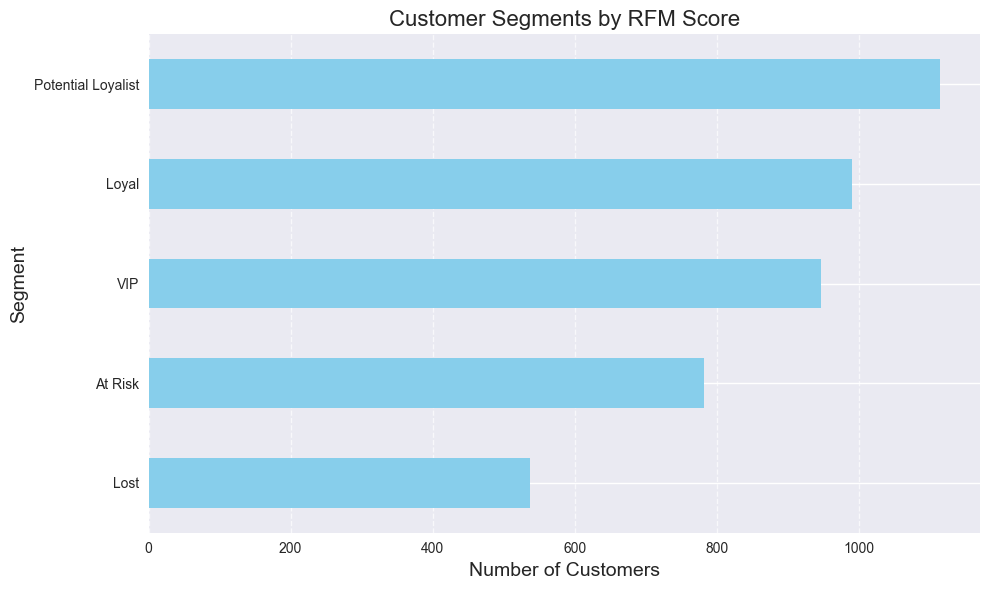

In [82]:
import matplotlib.pyplot as plt
# count customers per segment
segment_counts = rfm["Segment"].value_counts().sort_values(ascending = True)

# plotting
plt.figure(figsize = (10,6))
segment_counts.plot(kind = "barh", color = "skyblue")

plt.title("Customer Segments by RFM Score", fontsize = 16)
plt.xlabel("Number of Customers", fontsize = 14)
plt.ylabel("Segment", fontsize = 14)

plt.grid(axis = "x", linestyle = "--", alpha = 0.7)

plt.tight_layout()
plt.savefig("customer_segments_bar.png")
plt.show()

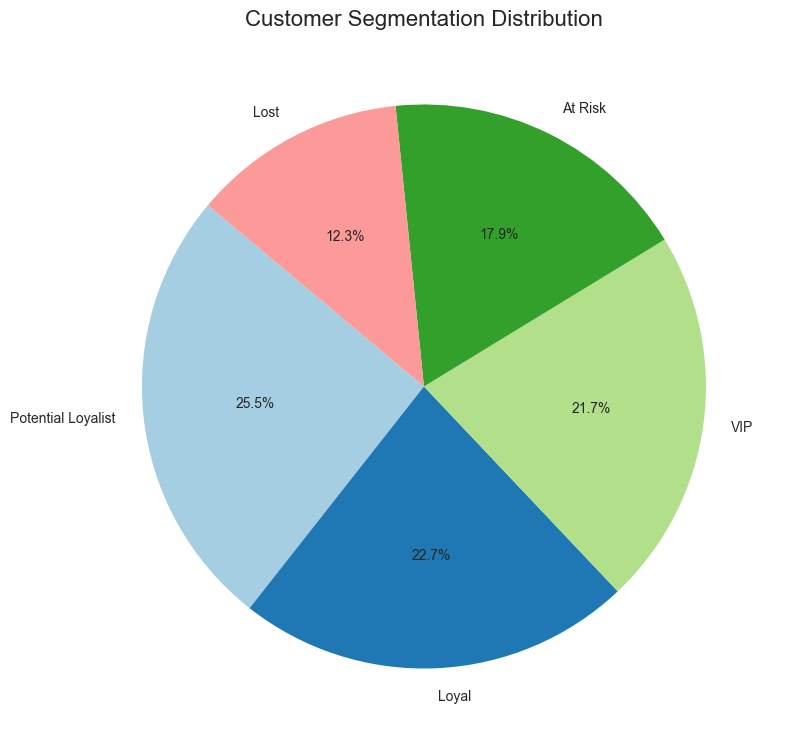

In [83]:
segment_counts = rfm["Segment"].value_counts()

plt.figure(figsize = (8,8))
plt.pie(segment_counts,
       labels = segment_counts.index,
       autopct = "%1.1f%%", # this adds percentage to the chart
       startangle = 140, # rotates the first slice to balance
       colors = plt.cm.Paired.colors # adds pleasant pre-defined colors
       )

plt.title("Customer Segmentation Distribution", fontsize = 16)
plt.tight_layout()
plt.savefig("customer_segments_pie")
plt.show()



###### Potential loyalist (25.5%) : Huge opportunity -> nuture these to become Loyal/VIP
######  Loyal (22.7%) : Solid customer base -> maintain engagement
###### VIP (21.7%) : High value -> protect and reward
###### At Risk (17.9%) : time to re-engage before churn
###### Lost (12.3%) Least active -> consider farewell or reactivation campaign

#### *3.3 Pareto Analysis*

In [92]:
# Group customer and calculate total revenue
pareto_df = df.groupby("CustomerID")["SalesRevenue"].sum().sort_values(ascending = False).reset_index()

# calculate percentage of total revenue per customer 
pareto_df["RevenuePct"] = pareto_df["SalesRevenue"] / pareto_df["SalesRevenue"].sum()

# calculate cummulative % of revenue
pareto_df["CumulativeRevenue"] = pareto_df["RevenuePct"].cumsum()

# calculate cummulative % of customers
pareto_df["CumulativeCustomers"] = (pareto_df.index + 1)/ len(pareto_df)

pareto_df.head()

,CustomerID,SalesRevenue,RevenuePct,CumulativeRevenue,CumulativeCustomers
0,14646.0,279489.02,0.033761,0.033761,0.000229
1,18102.0,256438.49,0.030976,0.064737,0.000457
2,17450.0,187322.17,0.022627,0.087365,0.000686
3,14911.0,132458.73,0.016000,0.103365,0.000915
4,12415.0,123725.45,0.014945,0.118310,0.001144


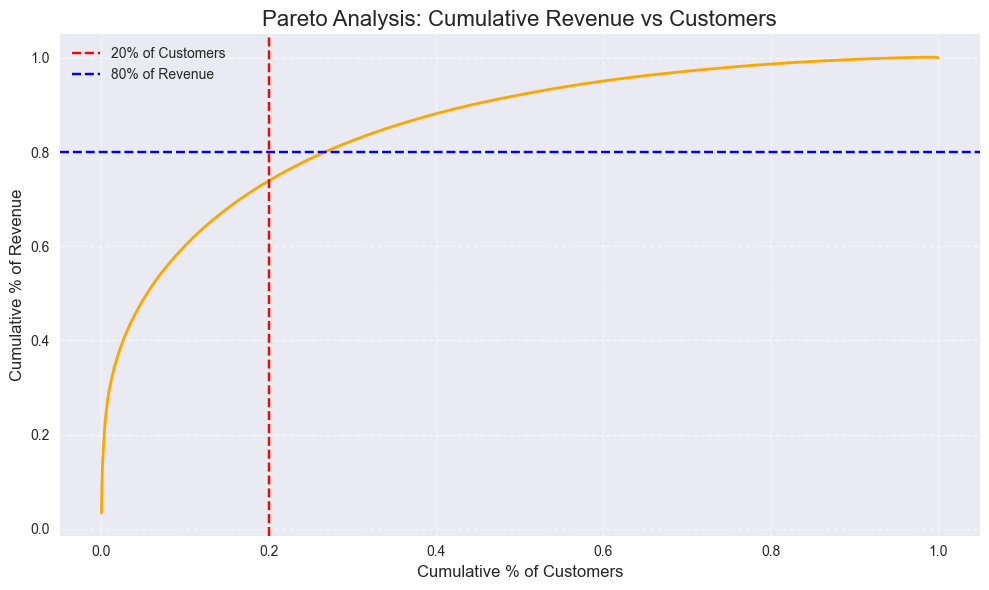

In [98]:
import matplotlib.pyplot as plt

# plot the pareto chart
plt.figure(figsize = (10,6))
plt.plot(pareto_df["CumulativeCustomers"], pareto_df["CumulativeRevenue"], color = "orange", linewidth = 2)

# Add reference lines for the 80/20 rule
plt.axvline(x = 0.2, color = "red", linestyle = "--", label = "20% of Customers") # adds a vertical line at 20% of customers
plt.axhline(y = 0.8, color = "blue", linestyle = "--", label = "80% of Revenue") # adds a horizontal line at 80% of revenue

# labels and title
plt.title("Pareto Analysis: Cumulative Revenue vs Customers", fontsize = 16)
plt.xlabel("Cumulative % of Customers", fontsize = 12)
plt.ylabel("Cumulative % of Revenue", fontsize = 12)

# Grid and Legend
plt.grid(True, linestyle = "--", alpha = 0.6)
plt.legend()
plt.tight_layout()

# save and show 
plt.savefig("pareto_chart.png")
plt.show()

###### The Pareto analysis shows that just over 20% of customers are responsible for approximately 80% of total revenue. This confirms a strong concentration pattern that aligns with Pareto principle and highlights the importance of high-value customer segments.